In [1]:
pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [2]:
import pandas as pd

# Display first few rows
print(X.head())

# Check for missing values
print(X.isnull().sum())

# Check target variable distribution
print(y.value_counts())

# Display dataset info
print(X.info())


   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9649122807017544


C:\Users\Rishiekaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.svm import SVC

# Train model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9649122807017544


C:\Users\Rishiekaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


C:\Users\Rishiekaa\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9736842105263158


Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



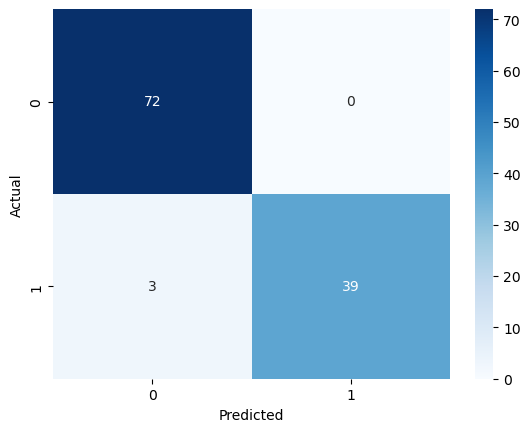

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Score:", grid_lr.best_score_)


Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression Score: 0.9758241758241759


C:\Users\Rishiekaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Define hyperparameters
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# GridSearchCV
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best parameters and accuracy
print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)


Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score: 0.9736263736263737


C:\Users\Rishiekaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest Score:", grid_rf.best_score_)


Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



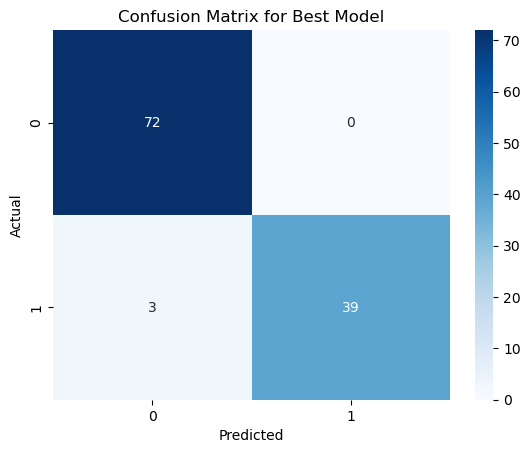

In [28]:
# Use best estimator
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model")
plt.show()


In [29]:
import joblib

# Save the best model
joblib.dump(best_rf, "breast_cancer_model.pkl")

# Save the scaler (optional)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [30]:
python --version


NameError: name 'python' is not defined

In [36]:
python3 --version


NameError: name 'python3' is not defined

In [38]:
pip install --upgrade pip

In [ ]:
! python --version


In [39]:
pip install streamlit --quiet


Note: you may need to restart the kernel to use updated packages.


In [42]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("breast_cancer_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Breast Cancer Prediction")

# Input fields for user
input_data = []
feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

for feature in feature_names:
    value = st.number_input(f"Enter {feature}", min_value=0.0)
    input_data.append(value)

# Predict button
if st.button("Predict"):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)

    result = "Benign" if prediction[0] == 1 else "Malignant"
    st.write(f"Prediction: **{result}**")


2025-08-12 18:45:21.858 
  command:

    streamlit run C:\Users\Rishiekaa\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-12 18:45:21.858 Session state does not function when running a script without `streamlit run`


In [44]:
import pickle


In [48]:
with open('breast_cancer_model.pkl', 'rb') as file:
    data = pickle.load(file)


In [50]:
import pickle

# Replace 'path_to_your_file.pkl' with the actual path to your PKL file
file_path = 'breast_cancer_model.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Now 'data' contains the deserialized Python object
print(data)


['B' 'M']
